## Lee información de archivo CSV

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("crautos.csv")

### Limpieza de datos

In [68]:
df.rename(columns = {'Combustible:':'combustible','Cilindrada:':'cilindrada','Transmisión:':'transmision','Estilo:':'estilo','Color Exterior:':'colorExt'},inplace=True)
df.rename(columns = {'Color Interior:':'colorInt','Placa:':'placa','Provincia:':'provincia'},inplace=True)

### Visualizacion de Datos

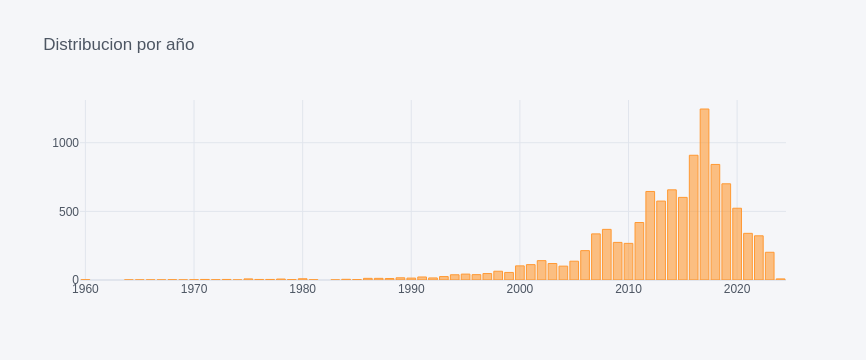

In [3]:
dft=df.groupby(['year']).marca.count()
dft.iplot(kind='bar',title='Distribucion por año')

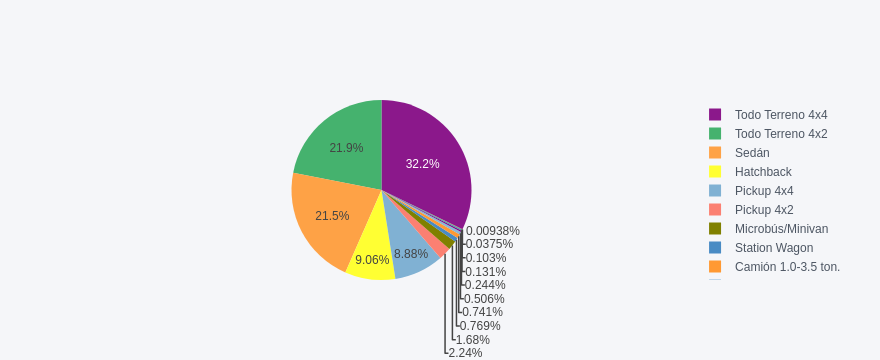

In [99]:
dft=df.groupby(['estilo']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.reset_index().iplot(kind='pie',labels='estilo',values='cantidad')

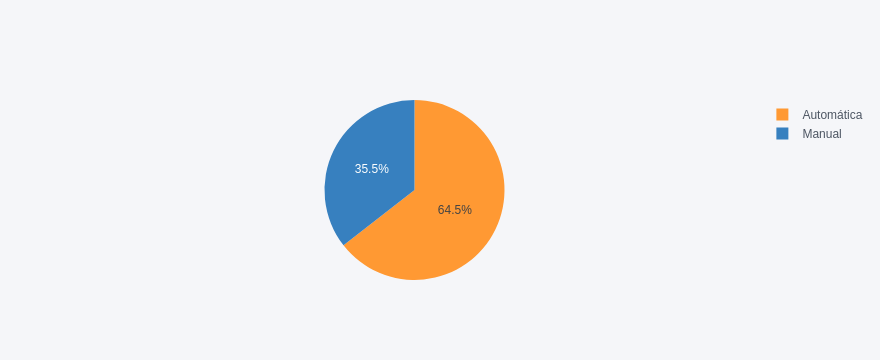

In [109]:
dft=df.groupby(['transmision']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.reset_index().iplot(kind='pie',labels='transmision',values='cantidad')

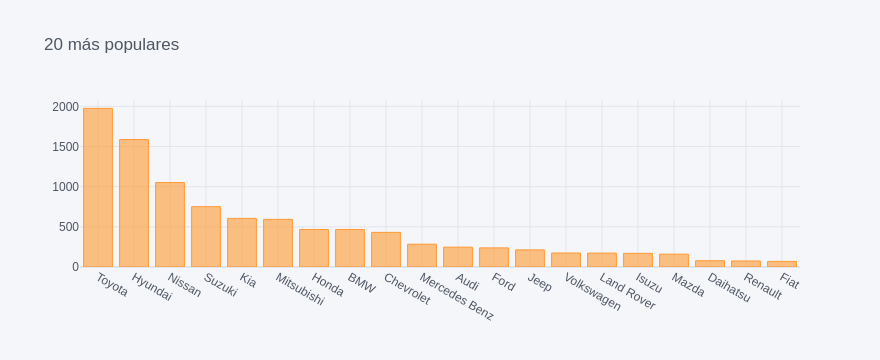

In [118]:
dft=df.groupby(['marca']).estilo.count()
dft=dft.to_frame(name='cantidad')
dft.sort_values(by='cantidad',ascending=False).head(20).iplot(kind='bar',title='20 más populares')

In [119]:
df

,year,marca,modelo,pasajeros,descripcion,precio,preciodolar,combustible,cilindrada,transmision,estilo,colorExt,colorInt,placa,provincia
0,2000,Fiat,PUNTO,5,"['PUNTO', '•', '5', 'Pas.']",200000,374,Gasolina,1242 cc,Manual,Hatchback,BLANCO,AZUL,Termina en 8,San José
1,1973,Volkswagen,VARIANT,5,"['VARIANT', '•', '5', 'Pas.']",500000,935,Gasolina,1800 cc,Manual,Station Wagon,AZUL,AZUL,Termina en 7,San José
2,1987,Nissan,SENTRA B12,5,"['SENTRA', 'B12', '•', '5', 'Pas.']",580000,1084,Gasolina,1600 cc,Manual,Sedán,ROJO,GRIS,Termina en 1,Cartago
3,2001,Hyundai,VERNA,5,"['VERNA', '•', '5', 'Pas.']",600000,1121,Gasolina,1500 cc,Manual,Sedán,BLANCO,NEGRO,Termina en 6,Alajuela
4,1993,Daihatsu,FEROZA,5,"['FEROZA', '•', '5', 'Pas.']",750000,1402,Gasolina,1500 cc,Manual,Todo Terreno 4x4,VERDE Y GRIS,GRIS,Termina en 8,San José
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,2022,Toyota,LAND CRUISER GXR,7,"['LAND', 'CRUISER', 'GXR', '•', '7', 'Pas.']",$168000,¢ 89880000,Diesel,3300 cc,Automática,Todo Terreno 4x4,BLANCO,BEIGE,Termina en 0,San José
10661,2021,Dodge/RAM,TRX,6,"['TRX', '•', '6', 'Pas.']",$169145,¢ 90492565,Gasolina,6200 cc,Automática,Pickup 4x4,GRIS,NEGRO,Termina en 0,San José
10662,2021,Dodge/RAM,1500 TRX,5,"['1500', 'TRX', '•', '5', 'Pas.']",$170074,¢ 90989777,Gasolina,6200 cc,Automática,Pickup 4x4,GRIS,NEGRO,Termina en 2,San José
10663,2023,Audi,A8 na na,na,"['A8', 'na', 'na', 'na', 'na', 'na']",NaN,NaN,Gasolina,3000 cc,Automática,Sedán,NaN,NaN,NaN,NaN


In [122]:
df.loc[df['pasajeros'] =='na'] 

,year,marca,modelo,pasajeros,descripcion,precio,preciodolar,combustible,cilindrada,transmision,estilo,colorExt,colorInt,placa,provincia
987,2008,Mazda,6 na na,na,"['6', 'na', 'na', 'na', 'na', 'na']",4495900,8404,Gasolina,2000 cc,Manual,Sedán,PLATA,NEGRO,Termina en 4,Alajuela
1164,1994,Nissan,PATROL na na,na,"['PATROL', 'na', 'na', 'na', 'na', 'na']",4750000,8879,Diesel,3200 cc,Manual,Todo Terreno 4x4,NEGRO,GRIS,Termina en 6,Alajuela
2230,2006,Audi,A4 na na,na,"['A4', 'na', 'na', 'na', 'na', 'na']",6000000,11215,Diesel,2000 cc,Automática,Sedán,GRIS,NEGRO,Termina en 5,San José
2231,2014,Nissan,TIIDA na na,na,"['TIIDA', 'na', 'na', 'na', 'na', 'na']",6000000,11215,Gasolina,1600 cc,Manual,Sedán,GRIS PLATA,GRIS,Termina en 6,Cartago
2232,1999,Hino,FD194 na na,na,"['FD194', 'na', 'na', 'na', 'na', 'na']",6000000,11215,Diesel,9999 cc,Manual,Microbús/Minivan,BLANCOCELESTE,Azul,ND,San José
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,2023,Audi,Q7 na na,na,"['Q7', 'na', 'na', 'na', 'na', 'na']",NaN,NaN,Diesel,3000 cc,Automática,Todo Terreno 4x4,NaN,NaN,NaN,NaN
10627,2023,Audi,SQ5 na na,na,"['SQ5', 'na', 'na', 'na', 'na', 'na']",NaN,NaN,Gasolina,3000 cc,Automática,Todo Terreno 4x4,NaN,NaN,NaN,NaN
10641,2023,Audi,Q8 na na,na,"['Q8', 'na', 'na', 'na', 'na', 'na']",NaN,NaN,Diesel,3000 cc,Automática,Todo Terreno 4x4,NaN,NaN,NaN,NaN
10644,2023,Audi e-tron,GT na na,na,"['e-tron', 'GT', 'na', 'na', 'na', 'na', 'na']",NaN,NaN,Eléctrico,0 cc,Automática,Sedán,NaN,NaN,NaN,NaN
